In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [2]:
# A is a class that keeps track of the estimation of epsilon-greedy algorithm
class A:
    def __init__(self, x):
        self.x = x                  # true mean
        self.est = 0                # estimation
        self.n = 0                  # number of times the arm is pulled
    def update(self, r):
        self.n += 1
        self.est = self.est + (r - self.est)/self.n

In [3]:
def q(eps):                         # eps is the probability of exploration, q is the function that returns the average reward and the optimal action
    Iter = 2000                     # number of iterations of the experiment
    T = 2000                        # number of time steps
    K = 10                          # number of arms
    reward_avg_iter_times = np.zeros(T) 
    opt_avg_iter_times = np.zeros(T)
    for i in tqdm(range(Iter), desc='eps = '+str(eps)):
        idx = np.empty(T)           # index of the reward temporally
        data = np.zeros(T)          # index of the optimal action temporally
        mean = np.random.normal(0, 1, K)
        actions = [A(mean[i]) for i in range(K)]        # initialize the arms with their true means which are sampled from N(0,1)
        for t in range(T):
            j = np.argmax([actions[i].est for i in range(K)])       # choose the arm with the largest estimation
            if np.random.random() < eps:
                a = np.random.randint(K)
            else:
                a = j
            r = np.random.normal(actions[a].x, 1)               # sample the reward from N(x,1), x is the true mean of the arm
            actions[a].update(r)                                # update the estimation of the arm
            idx[t] = r
            data[t] = 1 if a==np.argmax(mean) else 0
        # avg_reward = np.cumsum(idx) / np.arange(1, T+1)         # average reward of the current iteration
        # optinal_action = np.cumsum(data) / np.arange(1, T+1)    # optimal action of the current iteration
        avg_reward = idx
        optinal_action = data
        reward_avg_iter_times += avg_reward
        opt_avg_iter_times += optinal_action
    AVG_R = reward_avg_iter_times / Iter                        # average reward of all iterations
    OP_A = opt_avg_iter_times / Iter                            # optimal action of all iterations
    return AVG_R, OP_A


eps = 0.0: 100%|██████████| 2000/2000 [00:22<00:00, 88.95it/s]


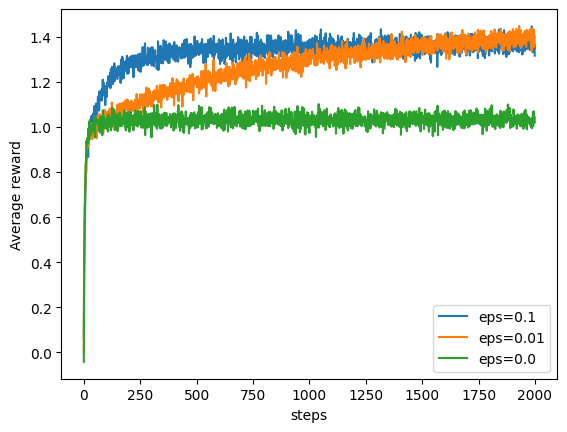

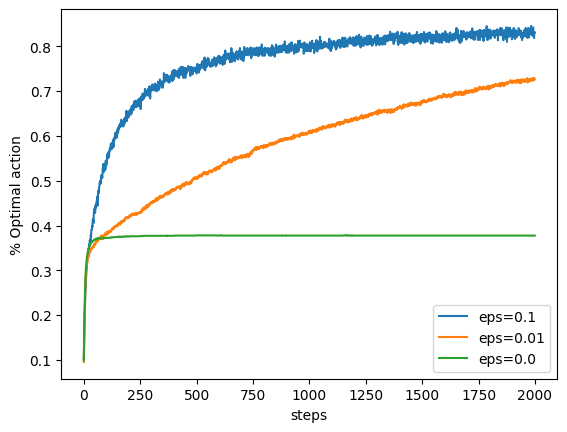

In [4]:
r1,o1 = q(0.1)                      # r1 is the average reward, o1 is the optimal action, eps=0.1
r2,o2 = q(0.01)                     # r2 is the average reward, o2 is the optimal action, eps=0.01
r3,o3 = q(0.0)                      # r3 is the average reward, o3 is the optimal action, eps=0.0

# plot the average reward
plt.plot(r1, label='eps=0.1')
plt.plot(r2, label='eps=0.01')
plt.plot(r3, label='eps=0.0')           
plt.xlabel('steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

# plot the optimal action
plt.plot(o1, label='eps=0.1')
plt.plot(o2, label='eps=0.01')
plt.plot(o3, label='eps=0.0')
plt.xlabel('steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()